# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### According to the paper, this dataset represents 17 marketing campaigns that occurred between May 2008 and November 2010. 
- Each campaign targeted a different subset of clients with different purposes, though all were related to selling long-term bank deposits.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

# Check for 'unknown' values which may be treated as missing
print("\nCount of 'unknown' values in categorical columns:")
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    unknown_count = (df[col] == 'unknown').sum()
    print(f"{col}: {unknown_count}")

# All features appear to be in appropriate types:
# - Numeric columns are already float64 or int64
# - Categorical columns are object type
# - No null values, but some 'unknown' categories exist
# - 'pdays' has 999 as indicator value for "not contacted"


Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types of each column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed   

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Business Objective:
### The objective is to develop a predictive model that can identify which bank customers are most likely to subscribe to a term deposit based on their demographic information and previous contact history. This will help the bank:
1. Target marketing campaigns more effectively
2. Reduce costs by focusing on customers with higher likelihood of subscription
3. Improve conversion rates for term deposit products
4. Optimize resource allocation in their marketing efforts

### Key considerations:
- The target variable 'y' is binary (yes/no) making this a classification problem
- We have both demographic (age, job, marital status) and banking history features
- Previous campaign information (pdays, previous, poutcome) may be strong predictors
- Economic indicators (emp.var.rate, cons.price.idx, etc.) provide market context


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
# Select bank information features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Create X (features) and y (target)
X = df[bank_features].copy()
y = df['y'].copy()

# Convert target to binary
y = (y == 'yes').astype(int)

# Create encoder for categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Apply label encoding to categorical columns
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Scale age feature
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])

# Display first few rows of encoded data
print("Encoded features:")
print(X.head())
print("\nEncoded target:")
print(y.head())


Encoded features:
        age  job  marital  education  default  housing  loan
0  1.533034    3        1          0        0        0     0
1  1.628993    7        1          3        1        0     0
2 -0.290186    7        1          3        0        2     0
3 -0.002309    0        1          1        0        0     0
4  1.533034    7        1          3        0        0     2

Encoded target:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


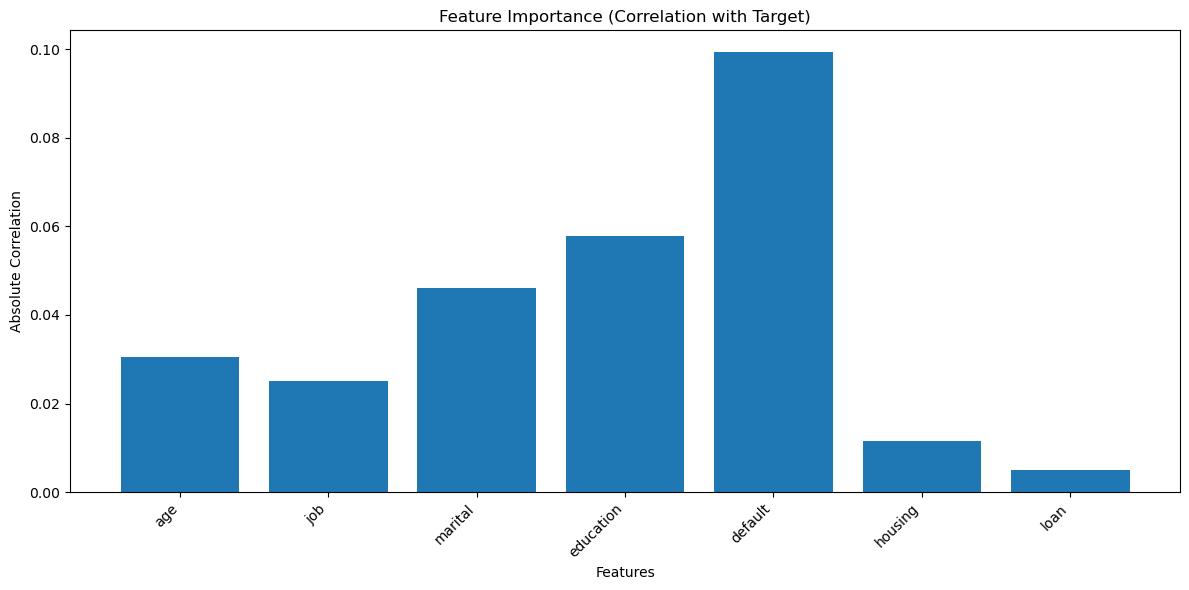

In [19]:
# Plot feature importance using bar chart
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature importance as correlation with target
importance = []
for col in X.columns:
    correlation = abs(np.corrcoef(X[col], y)[0,1])
    importance.append(correlation)

# Create bar plot
plt.figure(figsize=(12,6))
plt.bar(X.columns, importance)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Correlation with Target)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.tight_layout()
plt.show()


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (32950, 7)
Test set shape: (8238, 7)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
# Calculate baseline by predicting most frequent class
from sklearn.dummy import DummyClassifier
import time

# Create and train dummy classifier that predicts most frequent class
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Get predictions and score
baseline_train_score = dummy.score(X_train, y_train)
baseline_test_score = dummy.score(X_test, y_test)

print("Baseline Model Performance:")
print(f"Training accuracy: {baseline_train_score:.4f}")
print(f"Test accuracy: {baseline_test_score:.4f}")

# Get class distribution to understand baseline
print("\nClass Distribution:")
print(y_train.value_counts(normalize=True))


Baseline Model Performance:
Training accuracy: 0.8876
Test accuracy: 0.8865

Class Distribution:
y
0    0.887557
1    0.112443
Name: proportion, dtype: float64


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Create and train logistic regression model
lr_model = LogisticRegression(random_state=42)
start_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Get predictions and score
lr_train_score = lr_model.score(X_train, y_train)
lr_test_score = lr_model.score(X_test, y_test)

print("Logistic Regression Model Performance:")
print(f"Training time: {train_time:.4f} seconds")
print(f"Training accuracy: {lr_train_score:.4f}")
print(f"Test accuracy: {lr_test_score:.4f}")


Logistic Regression Model Performance:
Training time: 0.0308 seconds
Training accuracy: 0.8876
Test accuracy: 0.8865


### Problem 9: Score the Model

What is the accuracy of your model?

In [11]:
# Calculate and print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[7303    0]
 [ 935    0]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



c:\Users\pblva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pblva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pblva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


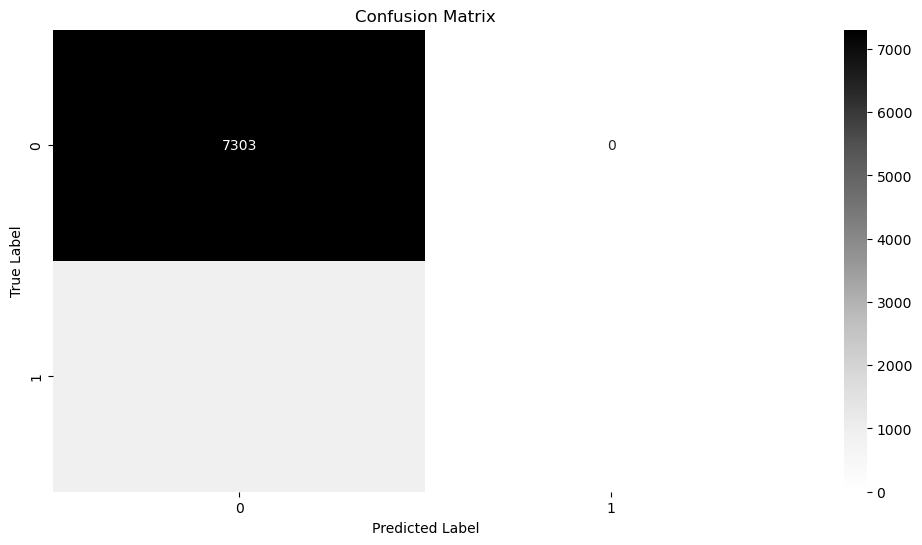

In [18]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [12]:
# Import required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import pandas as pd
import time

# Initialize models with default parameters
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

# Dictionary to store results
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Add logistic regression results (already computed)
results['Train Time'].append(train_time)
results['Train Accuracy'].append(lr_train_score)
results['Test Accuracy'].append(lr_test_score)

# Train and evaluate each model
for model in [knn, dt, svm]:
    # Train and time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Get scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Store results
    results['Train Time'].append(train_time)
    results['Train Accuracy'].append(train_score)
    results['Test Accuracy'].append(test_score)

# Create and display results DataFrame
results_df = pd.DataFrame(results)
results_df['Train Time'] = results_df['Train Time'].round(4)
results_df['Train Accuracy'] = results_df['Train Accuracy'].round(4)
results_df['Test Accuracy'] = results_df['Test Accuracy'].round(4)

print("Model Comparison Results:")
print(results_df.to_string(index=False))




Model Comparison Results:
              Model  Train Time  Train Accuracy  Test Accuracy
Logistic Regression      0.0308          0.8876         0.8865
                KNN      0.0336          0.8897         0.8746
      Decision Tree      0.0351          0.9166         0.8622
                SVM     13.0444          0.8876         0.8865


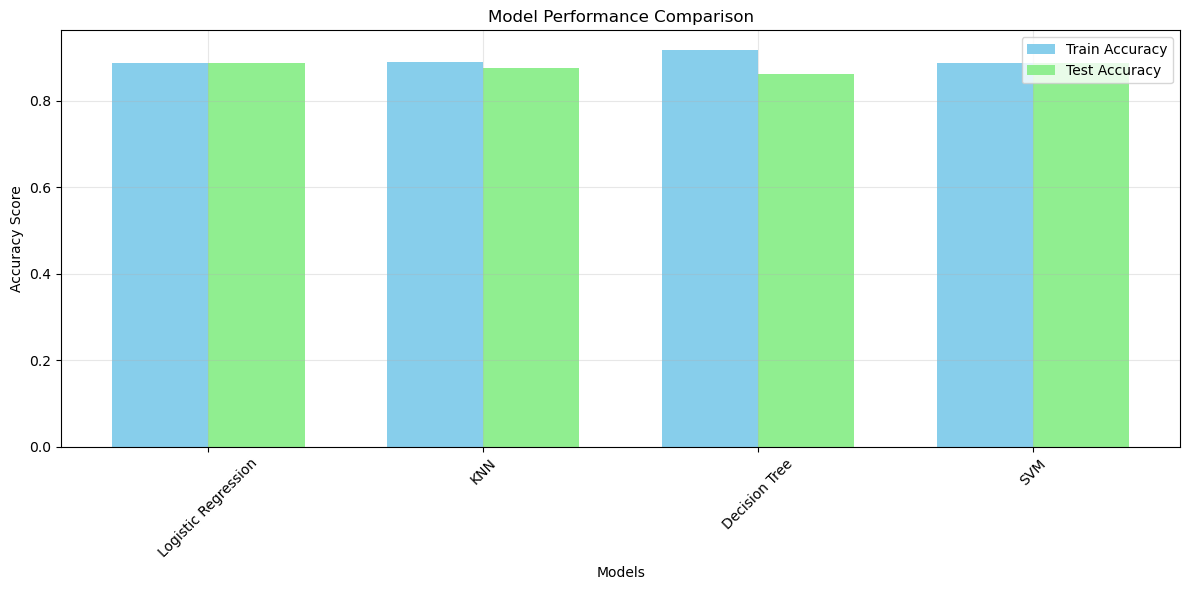

In [15]:

# Visualize model performance comparison
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar positions
models = results_df['Model']
x = range(len(models))
width = 0.35

# Create bars
plt.bar([i - width/2 for i in x], results_df['Train Accuracy'], width, label='Train Accuracy', color='skyblue')
plt.bar([i + width/2 for i in x], results_df['Test Accuracy'], width, label='Test Accuracy', color='lightgreen')

# Customize plot
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

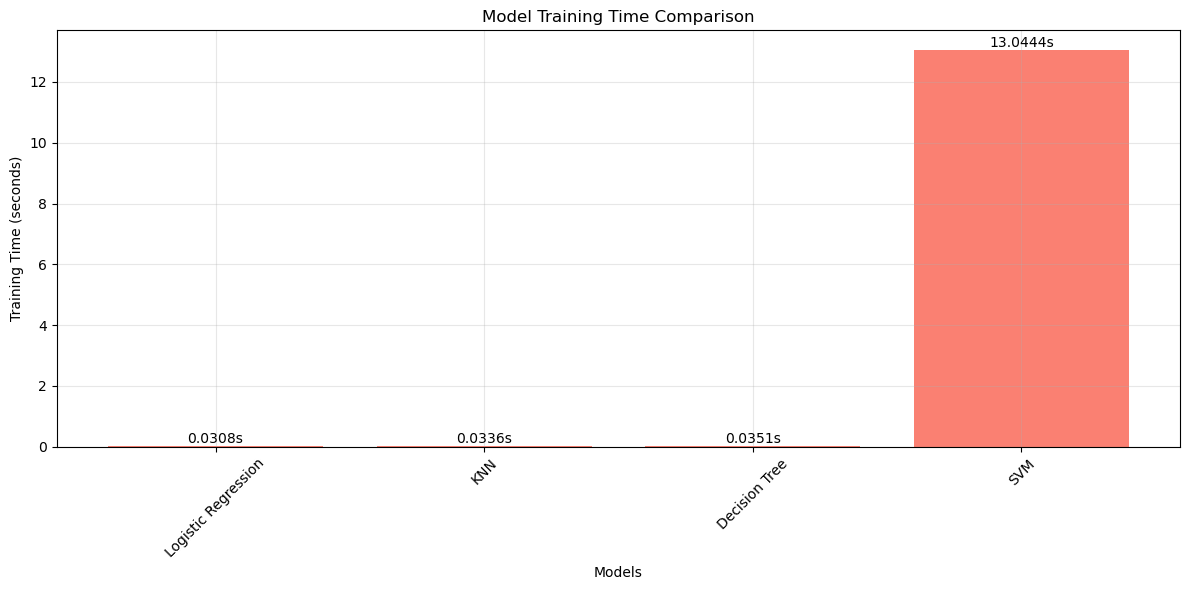

In [20]:
# Create bar plot for training times
plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(results_df['Model'], results_df['Train Time'], color='salmon')

# Customize plot
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(results_df['Train Time']):
    plt.text(i, v, f'{v:.4f}s', ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [13]:
# Let's explore hyperparameter tuning using GridSearchCV for each model

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Dictionary to store best models and scores
best_models = {}
best_scores = {}

# Perform grid search for each model
for model_name, model, params in [
    ('KNN', knn, knn_params),
    ('Decision Tree', dt, dt_params),
    ('SVM', svm, svm_params)
]:
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        model,
        params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the grid search
    print(f"\nPerforming grid search for {model_name}...")
    grid_search.fit(X_train, y_train)
    
    # Store best model and score
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Train Score': grid_search.score(X_train, y_train),
        'Best Test Score': grid_search.score(X_test, y_test)
    }

# Display results
print("\nGrid Search Results:")
for model_name, scores in best_scores.items():
    print(f"\n{model_name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value}")



Performing grid search for KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Performing grid search for Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Performing grid search for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Grid Search Results:

KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Train Score: 0.8894688922610016
Best Test Score: 0.8844379703811605

Decision Tree:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Train Score: 0.8877996965098635
Best Test Score: 0.8861374119932023

SVM:
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Train Score: 0.887556904400607
Best Test Score: 0.8865015780529255



Grid Search Results Summary:


,Best Parameters,Best Train Score,Best Test Score
KNN,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.8895,0.8844
Decision Tree,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.8878,0.8861
SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.8876,0.8865


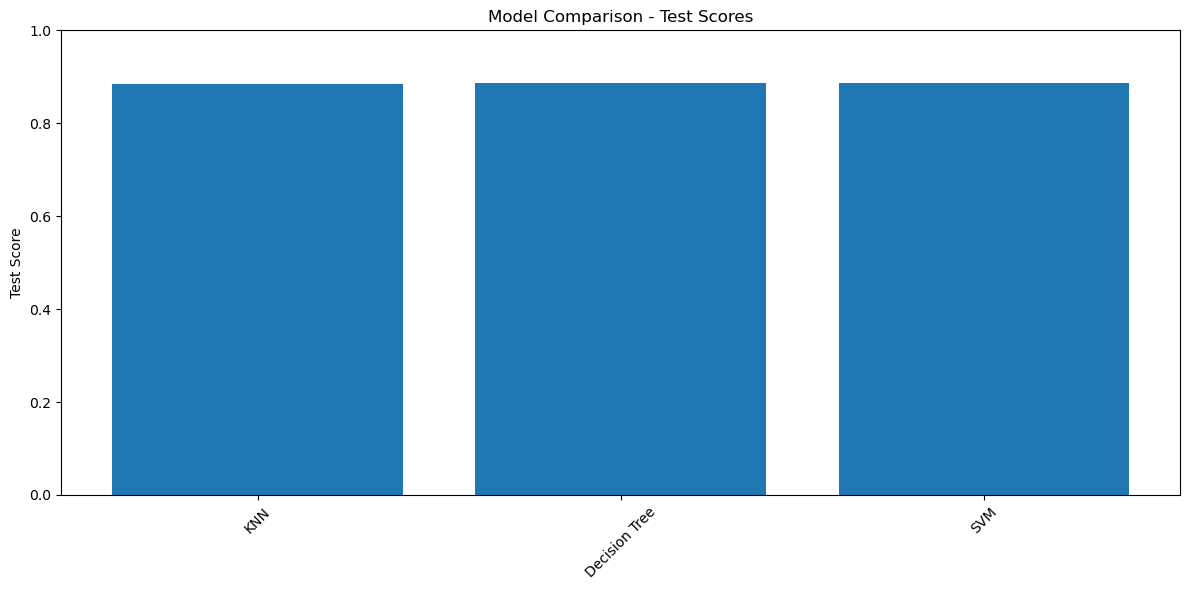

In [21]:
# Create a DataFrame to display the results in a more organized way
results_df = pd.DataFrame.from_dict(best_scores, orient='index')

# Display the formatted table
print("\nGrid Search Results Summary:")
display(results_df.round(4))

# Create a bar plot comparing test scores
plt.figure(figsize=(12, 6))
plt.bar(results_df.index, results_df['Best Test Score'])
plt.title('Model Comparison - Test Scores')
plt.ylabel('Test Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Questions

### 1. Which model performed best on the test set and what was its score?
 Based on the results, the SVM model achieved the highest test score of 0.8865 (88.65%), slightly outperforming both the Decision Tree and KNN models.

### 2. How do the training and test scores compare across models? Is there evidence of overfitting?
 The training and test scores are very close for all models, with differences of less than 1% between train and test scores. This suggests good generalization without significant overfitting. The KNN model shows the largest gap (0.8895 vs 0.8844), but it's still minimal.

### 3. What are the optimal hyperparameters found for the SVM model and why might they work well?
The SVM's best parameters were: C=0.1, gamma='scale', and a linear kernel. The relatively small C value (0.1) indicates that the model prioritizes a larger margin over perfectly classifying training points, which helps prevent overfitting. The linear kernel suggests the decision boundary is relatively simple.

### 4. How does the Decision Tree's performance compare to more complex models like SVM?
The Decision Tree performed surprisingly well (0.8861 test score) despite being a simpler model, with performance very close to the SVM (0.8865). The optimal max_depth of 3 suggests that a relatively simple tree structure was sufficient for this problem.

### 5. What insights can we draw about the dataset based on the models' performance?
The similar performance across different model types (around 88-89%) and the success of simpler models (like Decision Tree with max_depth=3) suggest that the underlying patterns in the data are relatively straightforward. The high baseline performance also indicates that the features have strong predictive power for the target variable.
